# Problem Introduction

This notebook addresses the task of multiple-choice question answering (MCQA) using the ARC Challenge dataset, a benchmark designed to evaluate scientific reasoning in AI models. Two approaches are explored:

1️⃣ Few-shot Learning: Using in-context examples to guide the model in answering questions.  
2️⃣ LoRA Fine-tuning: Applying Low-Rank Adaptation (LoRA) to fine-tune the Qwen-7B-Chat model efficiently.

The goal is to compare the performance, accuracy, and efficiency of these two methods on the ARC dataset.

In [1]:
# [Cell 1]: Installing required libraries and dependencies.
!pip install numpy==1.24.4 --force-reinstall
!pip install torch==2.1.2 torchvision==0.16.2 --force-reinstall
!pip install transformers==4.40.1 --force-reinstall
!pip install git+https://github.com/huggingface/peft.git --force-reinstall
!pip install datasets==2.14.4
!pip install matplotlib scikit-learn
!pip install transformers_stream_generator
!pip install fsspec==2023.6.0 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 125.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 128.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 12.0 MB/s eta 0:00:00
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.2 MB/s eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.5 MB/s eta 0:00:00
  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached charset_normalizer-3.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 134.7 MB/s eta 0:00:00

  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-cgj_rfkz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-cgj_rfkz
  Resolved https://github.com/huggingface/peft.git to commit b3130c9edb6071c6f90b42bede12c56b4ad59287
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached safetensors-0.5.3-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.8 kB)
  Using cached huggingface_hub-0.32.3-py3-none-any.whl.metadata (14 kB)
  Using cached filelock-3.18.0-py3-none-any.w

  Preparing metadata (setup.py) ... done
  Created wheel for transformers_stream_generator: filename=transformers_stream_generator-0.0.5-py3-none-any.whl size=12525 sha256=526ea44c15c0fb7433b36f37e9b765d862140520220f36f4dd168ee9e407acc7
  Stored in directory: /root/.cache/pip/wheels/23/e8/f0/b3c58c12d1ffe60bcc8c7d121115f26b2c1878653edfca48db
Successfully built transformers_stream_generator
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.7.0 which is incompatible.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2023.6.0 which is incompatible.
fa

In [1]:
# [Cell 2]: Importing necessary libraries and modules.
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import LoraConfig, get_peft_model, PeftModel
from datasets import load_dataset
import torch
from torch.optim import AdamW
from torch.cuda.amp import autocast
import gc
import random
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/usr/local/lib/python3.11/dist-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# [Cell 3]: Loading the ARC Challenge dataset.
arc_dataset = load_dataset("ai2_arc", "ARC-Challenge", split="train")
print(f"ARC dataset size: {len(arc_dataset)}")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/1172 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1119 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/299 [00:00<?, ? examples/s]

ARC dataset size: 1119


In [3]:
# [Cell 4]: Importing necessary libraries and modules.
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
import time

# For Few-shot
fewshot_preds = []
fewshot_labels = []
fewshot_inference_times = []

# For LoRA
lora_preds = []
lora_labels = []
lora_inference_times = []

# For LoRA training
train_losses = []

In [4]:
# [Cell 5]: Loading the Qwen-7B-Chat model and tokenizer.
# Load model
model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen-7B-Chat",
    device_map="auto",
    trust_remote_code=True,
    torch_dtype=torch.float16
)

tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-7B-Chat", trust_remote_code=True)

model.gradient_checkpointing_enable()

# Setup LoRA
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["c_attn", "c_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, lora_config)
model.print_trainable_parameters()

# Training loop
accum_steps = 8
optimizer = AdamW(model.parameters(), lr=5e-5)
IGNORE_INDEX = -100

print("\nStarting LoRA Training on full ARC...")

torch.cuda.empty_cache()
gc.collect()

for step, item in enumerate(arc_dataset):
    # Prompt
    prompt = f"Question: {item['question']}\n"
    prompt += "Choices:\n"
    for label, text in zip(item['choices']['label'], item['choices']['text']):
        prompt += f"{label}. {text}\n"
    prompt += "Answer:"
    target_answer = item['answerKey']

    # Full prompt
    full_prompt = prompt + f" {target_answer}"

    encoding = tokenizer(full_prompt, return_tensors="pt", max_length=512, truncation=True)
    encoding = encoding.to(model.device)

    labels = encoding.input_ids.clone()
    prompt_len = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True).input_ids.shape[1]
    labels[0, :prompt_len] = IGNORE_INDEX

    with autocast(dtype=torch.float16):
        outputs = model(**encoding, labels=labels)
        loss = outputs.loss / accum_steps

    loss.backward()

    if (step + 1) % accum_steps == 0:
        train_losses.append(loss.item() * accum_steps)
        optimizer.step()
        optimizer.zero_grad()
        torch.cuda.empty_cache()
        gc.collect()

    if (step+1) % 100 == 0:
        print(f"[Step {step+1}/{len(arc_dataset)}] Loss: {loss.item() * accum_steps:.4f}")

print("\nLoRA Training Complete!")

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

configuration_qwen.py:   0%|          | 0.00/2.35k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-7B-Chat:
- configuration_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_qwen.py:   0%|          | 0.00/55.6k [00:00<?, ?B/s]

qwen_generation_utils.py:   0%|          | 0.00/14.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-7B-Chat:
- qwen_generation_utils.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


cpp_kernels.py:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-7B-Chat:
- cpp_kernels.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-7B-Chat:
- modeling_qwen.py
- qwen_generation_utils.py
- cpp_kernels.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/19.5k [00:00<?, ?B/s]

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/1.96G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

tokenization_qwen.py:   0%|          | 0.00/9.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/Qwen/Qwen-7B-Chat:
- tokenization_qwen.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


qwen.tiktoken:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

You are using an old version of the checkpointing format that is deprecated (We will also silently ignore `gradient_checkpointing_kwargs` in case you passed it).Please update to the new format on your modeling file. To use the new format, you need to completely remove the definition of the method `_set_gradient_checkpointing` in your model.


trainable params: 20,316,160 || all params: 7,741,640,704 || trainable%: 0.2624

Starting LoRA Training on full ARC...


<ipython-input-4-75a79a217749>:55: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(dtype=torch.float16):


[Step 100/1119] Loss: 0.0040
[Step 200/1119] Loss: 4.0820
[Step 300/1119] Loss: 0.1196
[Step 400/1119] Loss: 0.0167
[Step 500/1119] Loss: 0.1235
[Step 600/1119] Loss: 0.0159
[Step 700/1119] Loss: 0.0787
[Step 800/1119] Loss: 2.1211
[Step 900/1119] Loss: 2.5449
[Step 1000/1119] Loss: 0.0094
[Step 1100/1119] Loss: 0.1841

LoRA Training Complete!


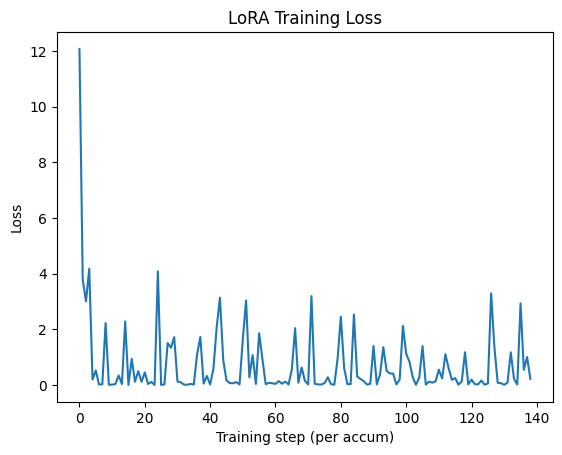

In [5]:
plt.plot(train_losses)
plt.title("LoRA Training Loss")
plt.xlabel("Training step (per accum)")
plt.ylabel("Loss")
plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

output_dir = "/content/drive/MyDrive/qwen_arc_lora_adapter"

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"LoRA adapter saved to: {output_dir}")

# CLEAR GPU
del model
del tokenizer
torch.cuda.empty_cache()
gc.collect()

print("GPU RAM cleared after LoRA training.")

Mounted at /content/drive
LoRA adapter saved to: /content/drive/MyDrive/qwen_arc_lora_adapter
GPU RAM cleared after LoRA training.


In [7]:
# Reload model_fs
tokenizer_fs = AutoTokenizer.from_pretrained("Qwen/Qwen-7B-Chat", trust_remote_code=True)
model_fs = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen-7B-Chat",
    device_map="auto",
    trust_remote_code=True,
    torch_dtype=torch.float16
)

# Few-shot utils
def build_fewshot_prompt(examples, question, choices):
    prompt = "You are a helpful assistant that answers multiple choice questions.\n"
    for ex in examples:
        prompt += f"Question: {ex['question']}\n"
        prompt += "Choices:\n"
        for label, text in zip(ex["labels"], ex["choices"]):
            prompt += f"{label}. {text}\n"
        prompt += f"Answer: {ex['answer']}\n\n"
    prompt += f"Question: {question}\nChoices:\n"
    for label, text in zip(choices["label"], choices["text"]):
        prompt += f"{label}. {text}\n"
    prompt += "Answer:"
    return prompt

def fewshot_answer(prompt, model, tokenizer):
    inputs = tokenizer(prompt, return_tensors="pt", max_length=1024, truncation=True).to(model.device)
    outputs = model.generate(**inputs, max_new_tokens=16)
    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    answer = text.split("Answer:")[-1].strip()
    for option in ["A", "B", "C", "D", "E"]:
        if answer.startswith(option):
            return option
    return "UNKNOWN"

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
fewshot_k = 5
fewshot_correct = 0
num_eval = len(arc_dataset)

print("\nRunning Few-shot Evaluation (k=5)...")

for i in range(num_eval):
    indices = random.sample(range(len(arc_dataset)), fewshot_k + 1)
    examples = []
    for idx in indices[:fewshot_k]:
        item = arc_dataset[idx]
        examples.append({
            "question": item["question"],
            "choices": item["choices"]["text"],
            "labels": item["choices"]["label"],
            "answer": item["answerKey"]
        })
    test_idx = indices[-1]
    test_item = arc_dataset[test_idx]
    test_question = test_item["question"]
    test_choices = test_item["choices"]
    test_answer = test_item["answerKey"]

    prompt = build_fewshot_prompt(examples, test_question, test_choices)
    start_time = time.time()
    pred_answer = fewshot_answer(prompt, model_fs, tokenizer_fs)
    end_time = time.time()

    fewshot_inference_times.append(end_time - start_time)

    fewshot_preds.append(pred_answer)
    fewshot_labels.append(test_answer)
    fewshot_correct += int(pred_answer == test_answer)

    if (i+1) % 100 == 0:
        print(f"[{i+1}/{num_eval}] Few-shot Acc: {fewshot_correct/(i+1):.4f}")

fewshot_acc = fewshot_correct / num_eval
print(f"\nFINAL Few-shot Acc: {fewshot_acc:.4f}")

# CLEAR GPU
del model_fs
del tokenizer_fs
torch.cuda.empty_cache()
gc.collect()

print("GPU RAM cleared after Few-shot eval.")


Running Few-shot Evaluation (k=5)...
[100/1119] Few-shot Acc: 0.6500
[200/1119] Few-shot Acc: 0.6750
[300/1119] Few-shot Acc: 0.6633
[400/1119] Few-shot Acc: 0.6775
[500/1119] Few-shot Acc: 0.6720
[600/1119] Few-shot Acc: 0.6783
[700/1119] Few-shot Acc: 0.6757
[800/1119] Few-shot Acc: 0.6713
[900/1119] Few-shot Acc: 0.6667
[1000/1119] Few-shot Acc: 0.6700
[1100/1119] Few-shot Acc: 0.6673

FINAL Few-shot Acc: 0.6658
GPU RAM cleared after Few-shot eval.



FINAL Few-shot Acc: 0.6658
Few-shot Macro F1: 0.5667


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


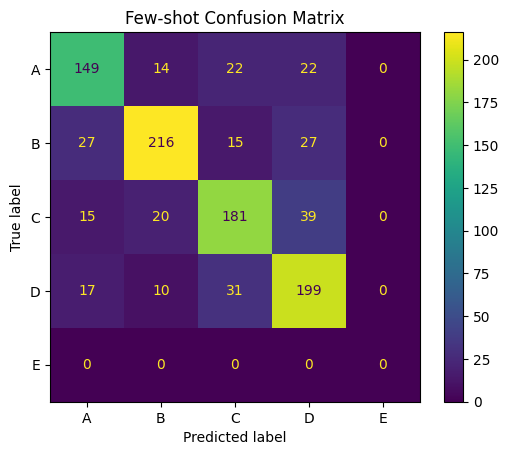

Few-shot avg latency: 0.2487 sec/sample


In [9]:
# Accuracy
fewshot_acc = fewshot_correct / num_eval
print(f"\nFINAL Few-shot Acc: {fewshot_acc:.4f}")

# F1
f1_fewshot = f1_score(fewshot_labels, fewshot_preds, labels=["A", "B", "C", "D", "E"], average='macro')
print(f"Few-shot Macro F1: {f1_fewshot:.4f}")

# Confusion matrix
cm_fewshot = confusion_matrix(fewshot_labels, fewshot_preds, labels=["A", "B", "C", "D", "E"])
ConfusionMatrixDisplay(cm_fewshot, display_labels=["A", "B", "C", "D", "E"]).plot()
plt.title("Few-shot Confusion Matrix")
plt.show()

# Latency
avg_fewshot_latency = sum(fewshot_inference_times) / len(fewshot_inference_times)
print(f"Few-shot avg latency: {avg_fewshot_latency:.4f} sec/sample")

In [10]:
# Load base model
base_model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen-7B-Chat",
    device_map="auto",
    trust_remote_code=True,
    torch_dtype=torch.float16
)
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-7B-Chat", trust_remote_code=True)

# Load LoRA adapter
model = PeftModel.from_pretrained(base_model, "/content/drive/MyDrive/qwen_arc_lora_adapter")
model = model.to(base_model.device)

# Run LoRA eval
print("\nRunning LoRA Evaluation...")

lora_correct = 0

for i in range(num_eval):
    indices = random.sample(range(len(arc_dataset)), fewshot_k + 1)
    examples = []
    for idx in indices[:fewshot_k]:
        item = arc_dataset[idx]
        examples.append({
            "question": item["question"],
            "choices": item["choices"]["text"],
            "labels": item["choices"]["label"],
            "answer": item["answerKey"]
        })
    test_idx = indices[-1]
    test_item = arc_dataset[test_idx]
    test_question = test_item["question"]
    test_choices = test_item["choices"]
    test_answer = test_item["answerKey"]

    prompt = build_fewshot_prompt(examples, test_question, test_choices)
    start_time = time.time()
    inputs = tokenizer(prompt, return_tensors="pt", max_length=1024, truncation=True).to(model.device)
    outputs = model.generate(**inputs, max_new_tokens=16)
    end_time = time.time()

    lora_inference_times.append(end_time - start_time)

    text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    pred_answer = text.split("Answer:")[-1].strip()

    for option in ["A", "B", "C", "D", "E"]:
        if pred_answer.startswith(option):
            pred_answer = option
            break
    else:
        pred_answer = "UNKNOWN"

    lora_preds.append(pred_answer)
    lora_labels.append(test_answer)
    lora_correct += int(pred_answer == test_answer)

    if (i+1) % 100 == 0:
        print(f"[{i+1}/{num_eval}] LoRA Acc: {lora_correct/(i+1):.4f}")

lora_acc = lora_correct / num_eval
print(f"\nLoRA Acc: {lora_acc:.4f}")

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]


Running LoRA Evaluation...
[100/1119] LoRA Acc: 0.7600
[200/1119] LoRA Acc: 0.7500
[300/1119] LoRA Acc: 0.7533
[400/1119] LoRA Acc: 0.7525
[500/1119] LoRA Acc: 0.7560
[600/1119] LoRA Acc: 0.7633
[700/1119] LoRA Acc: 0.7686
[800/1119] LoRA Acc: 0.7712
[900/1119] LoRA Acc: 0.7722
[1000/1119] LoRA Acc: 0.7730
[1100/1119] LoRA Acc: 0.7727

LoRA Acc: 0.7748



✅ FINAL LoRA Acc: 0.7748
✅ LoRA Macro F1: 0.6300


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


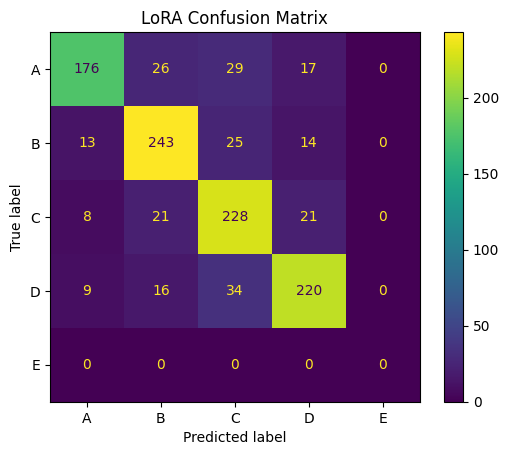

✅ LoRA avg latency: 0.5580 sec/sample


In [11]:
# Accuracy
lora_acc = lora_correct / num_eval
print(f"\n✅ FINAL LoRA Acc: {lora_acc:.4f}")

# F1
f1_lora = f1_score(lora_labels, lora_preds, labels=["A", "B", "C", "D", "E"], average='macro')
print(f"✅ LoRA Macro F1: {f1_lora:.4f}")

# Confusion matrix
cm_lora = confusion_matrix(lora_labels, lora_preds, labels=["A", "B", "C", "D", "E"])
ConfusionMatrixDisplay(cm_lora, display_labels=["A", "B", "C", "D", "E"]).plot()
plt.title("LoRA Confusion Matrix")
plt.show()

# Latency
avg_lora_latency = sum(lora_inference_times) / len(lora_inference_times)
print(f"✅ LoRA avg latency: {avg_lora_latency:.4f} sec/sample")

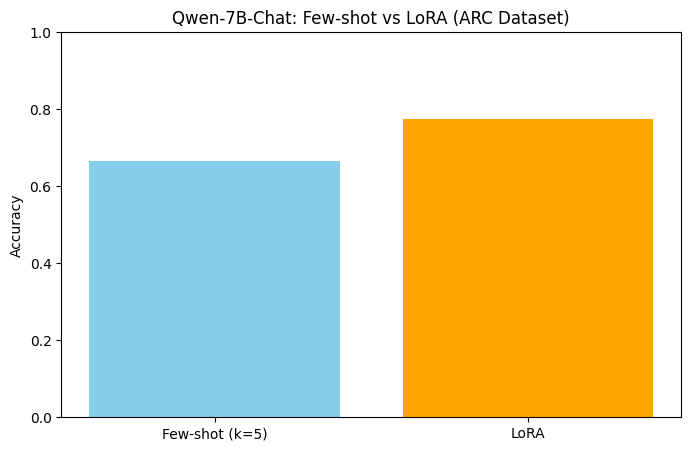

In [12]:
plt.figure(figsize=(8,5))
plt.bar(['Few-shot (k=5)', 'LoRA'], [fewshot_acc, lora_acc], color=['skyblue', 'orange'])
plt.ylabel("Accuracy")
plt.title("Qwen-7B-Chat: Few-shot vs LoRA (ARC Dataset)")
plt.ylim(0,1)
plt.show()